# Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import pandas as pd

In [2]:
sheet_1 = pd.read_excel('Datos ambientales 2016 al 2019 - Piscinas Sur al 5-6-19.xlsx', sheet_name='P. Sur Oriente')
sheet_2 = pd.read_excel('Datos ambientales 2016 al 2019 - Piscinas Sur al 5-6-19.xlsx', sheet_name='P. Sur Poniente')

In [3]:
sheet_1.head()

,Fecha,Amonio total EFB,Amoniaco EFB (NH3-N) Mg/L,Nitrito EFB ( NO2) Mg/L,Nitrato EFB ( NO3) Mg/L,pH EFB,T ° C EFB,Amonio total SFB,Amoniaco SFB (NH3-N) Mg/L,Nitrito SFB ( NO2) Mg/L,Nitrato SFB ( NO3) Mg/L,pH SFB,T ° C SFB,Alimentacion (Kg)
0,2016-08-16,,NaN,NaN,NaN,NaN,NaN,0.77,NaN,0.28,2.7,8,NaN,NaN
1,2016-08-17,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,0.23,2.8,8.2,NaN,NaN
2,2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.27,12.5,8.2,NaN,NaN
3,2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,0.27,12.8,8.1,NaN,NaN
4,2016-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se aprecia en un principio muchos datos tienen entradas en `NaN`, pero más adelante los datos están más completos.

In [4]:
def translated(df):
    measures = ['ammonium', 'ammoniac', 'nitrite', 'nitrate', 'ph', 'temperature']
    total_measures = [i + '_efb' for i in measures] + [i + '_sfb' for i in measures]
    df2 = df.set_axis(['date'] + total_measures + ['food'], axis=1, inplace=False)
    return df2

pool_1_df = translated(sheet_1)
pool_2_df = translated(sheet_2)

In [5]:
original_cols = sheet_1.columns[1:]
columns_1 = pool_1_df.columns[1:]
columns_2 = pool_2_df.columns[1:]

In [6]:
def to_numpy(df):
    data_columns = [i for i in df.columns if i != 'date']
    dates = np.array(df['date'])
    data = np.array(df[data_columns])
    return dates, data

dates_1, pool_1 = to_numpy(pool_1_df)
dates_2, pool_2 = to_numpy(pool_2_df)

## Visualizaciones

### Histogramas

En primer lugar se muestran histogramas de cada columna, es decir, cada parámetro, para poder apreciar posibles distribuciones de los datos.

In [7]:
def histograms(data, cols):
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12), constrained_layout=True)
    for i in range(13):
        ixs = i // 3, i % 3
        axes[ixs].set_title(f'Histograma {original_cols[i]}')
        data_i = np.where(data[:, i] == ' ', 'nan', data[:, i]).astype(float)
        data_i = data_i[~np.isnan(data_i)]
        axes[ixs].hist(data_i)
        axes[ixs].legend(['Measurements'])
        axes[ixs].set_xlabel('Value')
        axes[ixs].set_ylabel('Frequency')
    axes[-1, -1].axis('off')
    axes[-1, -2].axis('off')
    plt.show()

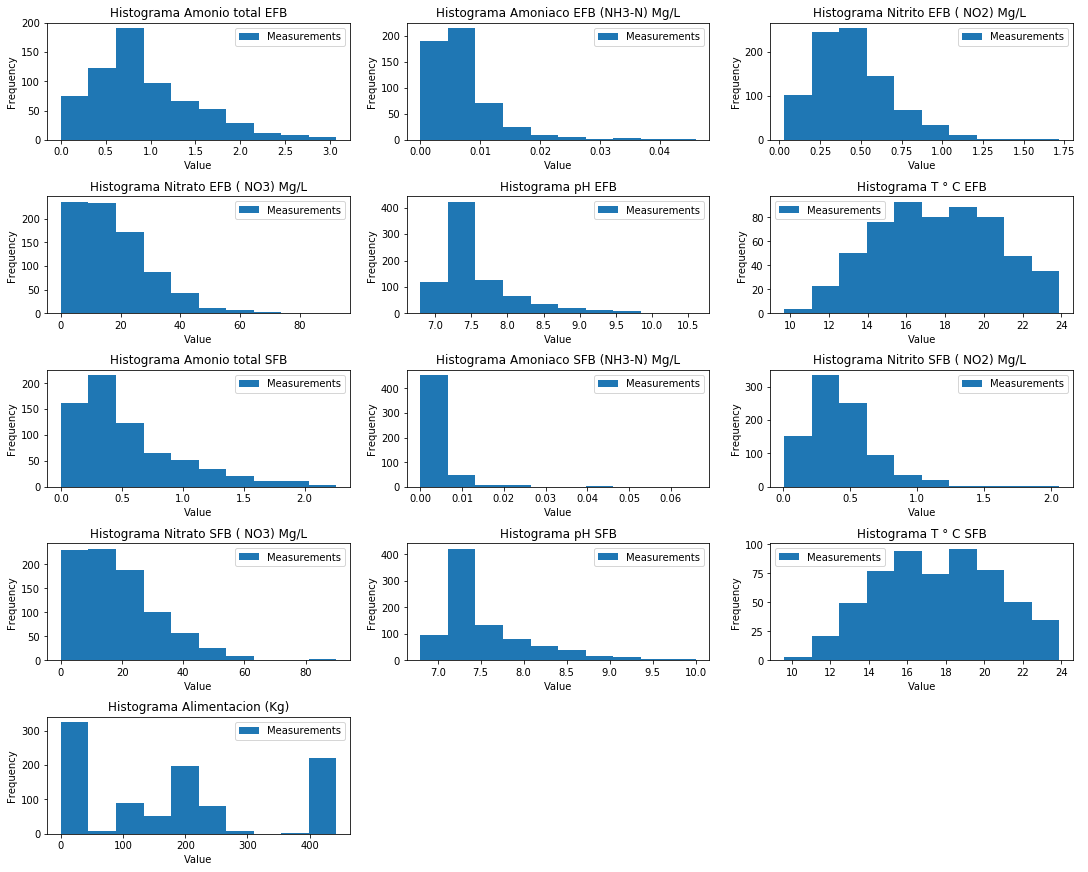

In [8]:
histograms(pool_1, columns_1)

### Series de tiempo

En segundo lugar, se muestran los datos como series de tiempo, para apreciar esta vez el comportamiento de cada uno con la temporalidad correspondiente

In [9]:
def time_series(data, cols, dates):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 17.5), constrained_layout=True)
    for i in range(13):
        ixs = i // 2, i % 2
        axes[ixs].set_title(f'Serie de tiempo de {original_cols[i]}')
        data_i = np.where(data[:, i] == ' ', 'nan', data[:, i]).astype(float)
        dates_i = dates[~np.isnan(data_i)]
        data_i = data_i[~np.isnan(data_i)]
        axes[ixs].plot(dates_i, data_i)
        axes[ixs].tick_params(axis='x', rotation=45)
        axes[ixs].legend(['Measurement'])
        axes[ixs].set_xlabel('Date')
        axes[ixs].set_ylabel('Value')
    axes[-1, -1].axis('off')
    plt.show()

/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


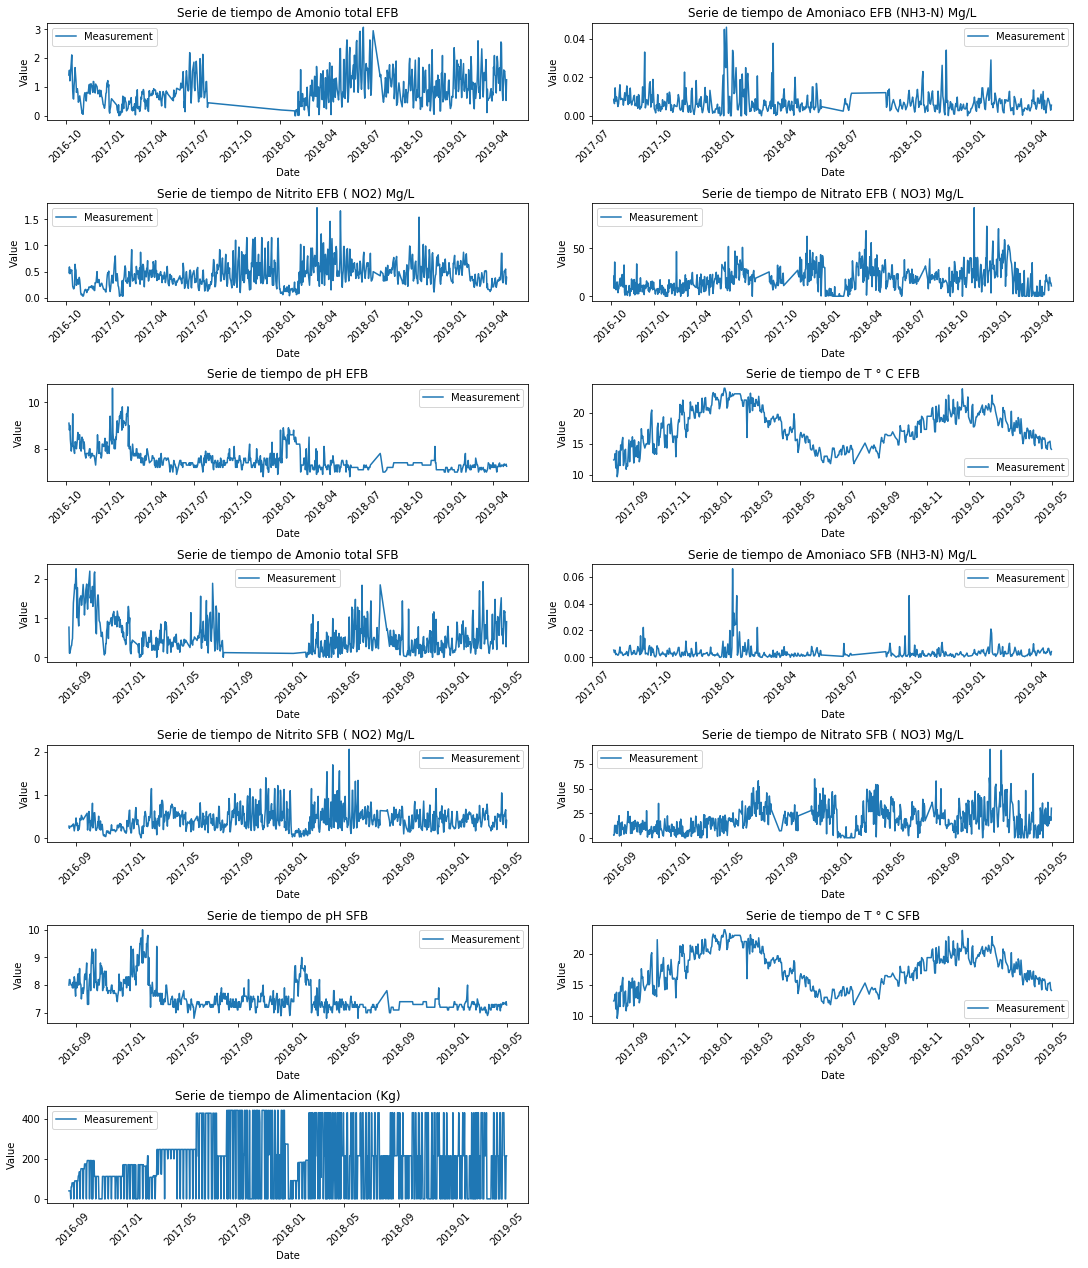

In [10]:
time_series(pool_1, columns_1, dates_1)

### Series de tiempo agregadas por mes
Ahora se agrupan datos promediando por mes, de modo de mirar el comportamiento de los datos con menor ruido diario, para ver si otorgan mejores _insights_.

In [11]:
pool_1_avg_df = pool_1_df.replace(' ', np.nan).groupby(
    pool_1_df['date'].dt.strftime('%Y-%m'), sort=True).mean().reset_index()
pool_2_avg_df = pool_2_df.replace(' ', np.nan).groupby(
    pool_2_df['date'].dt.strftime('%Y-%m'), sort=True).mean().reset_index()

In [12]:
columns_1_avg = pool_1_avg_df.columns
columns_2_avg = pool_2_avg_df.columns

In [13]:
dates_1_avg, pool_1_avg = to_numpy(pool_1_avg_df)
dates_2_avg, pool_2_avg = to_numpy(pool_2_avg_df)

/Users/raimundoherrera/Desktop/Envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


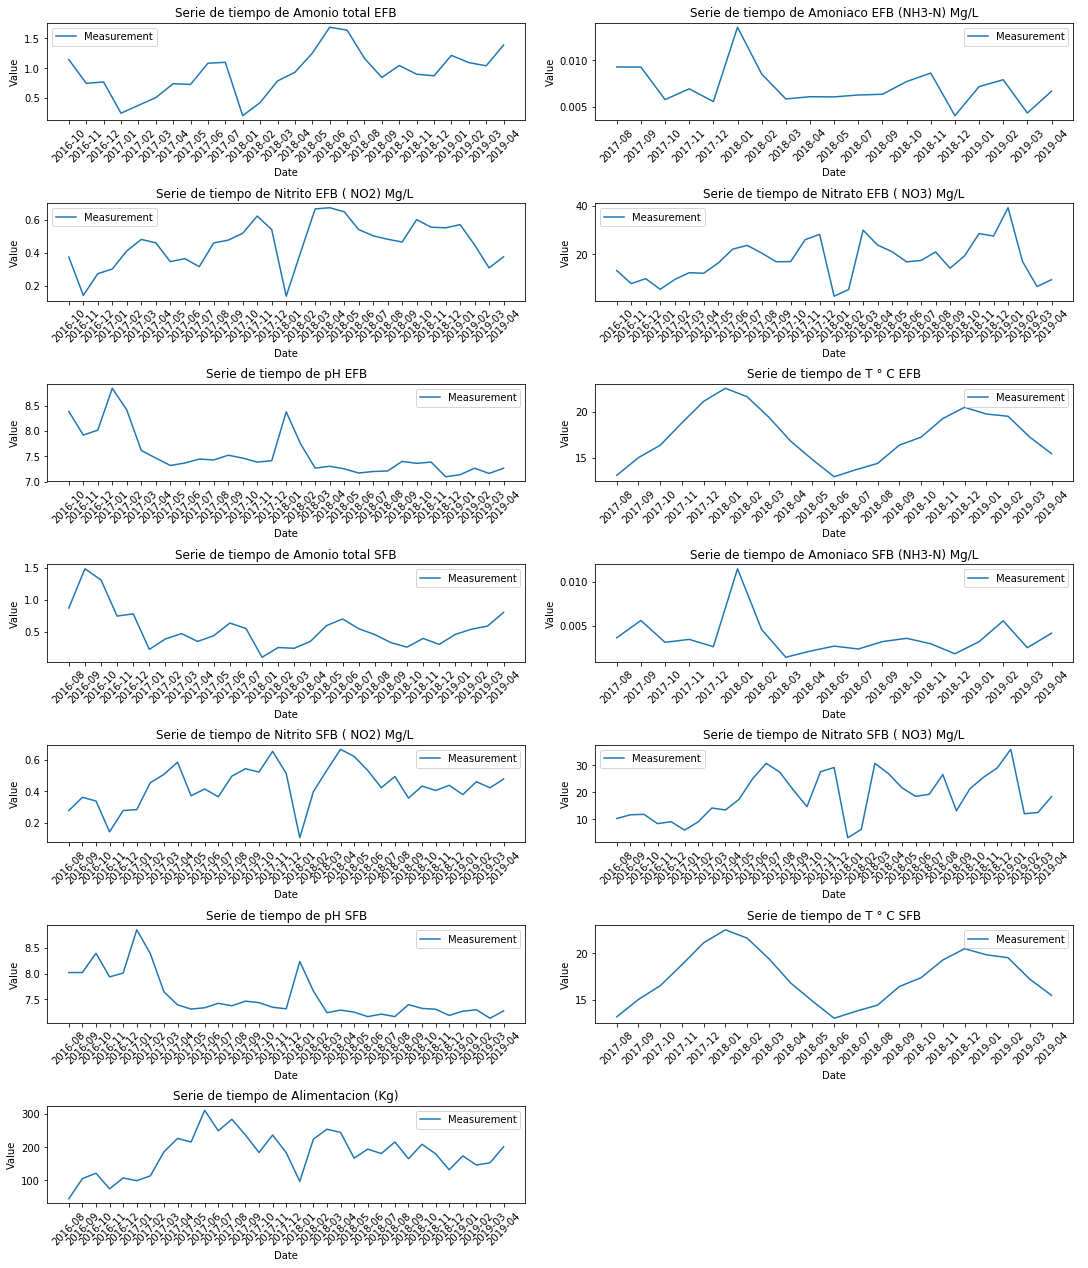

In [14]:
time_series(pool_1_avg, columns_1_avg, dates_1_avg)

### Histogramas con ajuste normal

Para mostrar de mejor manera los histogramas, se procede a mostrarlos como densidad, y además con la normal correspondiente a la media y desviación de los datos, esto es $a}(\bar{x}, s)$.

In [15]:
from scipy.stats import norm

In [16]:
def histograms_normal(data, cols):
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12), constrained_layout=True)
    for i in range(13):
        ixs = i // 3, i % 3
        axes[ixs].set_title(f'Histograma {original_cols[i]}')
        data_i = np.where(data[:, i] == ' ', 'nan', data[:, i]).astype(float)
        data_i = data_i[~np.isnan(data_i)]
        axes[ixs].hist(data_i, density=True, label='Measurements')
        
        mu, sigma = data_i.mean(), data_i.std()
        normal = norm(mu, sigma)
        xmin, xmax = axes[ixs].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        axes[ixs].plot(x, normal.pdf(x), label='Normal adjustment')
        axes[ixs].set_xlabel('Value')
        axes[ixs].set_ylabel('Denisity')
        axes[ixs].legend()
    axes[-1, -1].axis('off')
    axes[-1, -2].axis('off')
    plt.show()

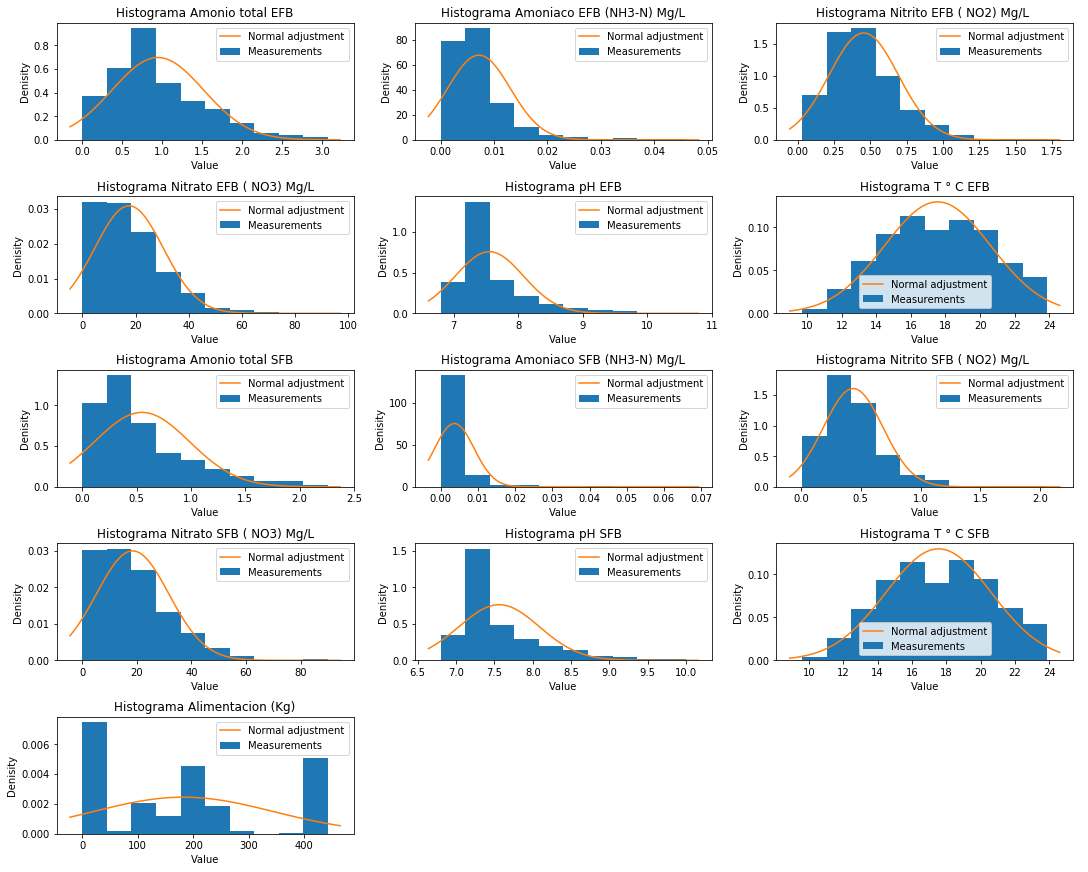

In [17]:
histograms_normal(pool_1, columns_1)

### Estadísticas

Ahora se muestran las medias, desviaciones, cuartiles, mínimos y máximos para cada parámetro

In [18]:
pool_1_df.replace(' ', np.nan).describe()

,ammonium_efb,ammoniac_efb,nitrite_efb,nitrate_efb,ph_efb,temperature_efb,ammonium_sfb,ammoniac_sfb,nitrite_sfb,nitrate_sfb,ph_sfb,temperature_sfb,food
count,655.000000,522.000000,859.000000,797.000000,812.000000,578.000000,697.000000,519.000000,895.000000,843.000000,860.000000,577.000000,980.000000
mean,0.944038,0.007154,0.454756,17.550627,7.553030,17.542768,0.549383,0.003673,0.437479,18.431649,7.561070,17.554419,182.290632
std,0.571841,0.005894,0.238742,12.897000,0.527667,3.075812,0.438111,0.005309,0.248587,13.296322,0.522776,3.077921,162.759975
min,0.000000,0.000000,0.030000,0.000000,6.800000,9.700000,0.000000,0.000000,0.010000,0.000000,6.800000,9.600000,0.000000
25%,0.565000,0.003500,0.290000,7.900000,7.200000,15.200000,0.240000,0.001400,0.260000,8.400000,7.200000,15.200000,0.000000
50%,0.840000,0.005800,0.430000,15.500000,7.400000,17.400000,0.430000,0.002400,0.400000,16.300000,7.400000,17.300000,191.800000
75%,1.255000,0.008800,0.580000,24.700000,7.700000,20.000000,0.750000,0.004100,0.560000,25.700000,7.700000,20.000000,247.300000
max,3.070000,0.046000,1.720000,92.300000,10.600000,23.900000,2.260000,0.066000,2.060000,90.000000,10.000000,23.900000,442.900000


### Correlaciones

Luego las correlaciones entre ellos, primero en una tabla:

In [19]:
correlations = pool_1_df.replace(' ', np.nan).corr()
correlations

,ammonium_efb,ammoniac_efb,nitrite_efb,nitrate_efb,ph_efb,temperature_efb,ammonium_sfb,ammoniac_sfb,nitrite_sfb,nitrate_sfb,ph_sfb,temperature_sfb,food
ammonium_efb,1.000000,0.434848,0.445454,0.266835,-0.402791,-0.410981,0.588764,0.280970,0.518158,0.280817,-0.385716,-0.415038,0.128517
ammoniac_efb,0.434848,1.000000,0.151547,-0.006727,0.458035,0.111765,0.259528,0.418712,0.191515,-0.054044,0.413821,0.109408,-0.046208
nitrite_efb,0.445454,0.151547,1.000000,0.495764,-0.386707,-0.059525,0.122088,-0.023775,0.834236,0.399640,-0.399565,-0.058905,-0.070823
nitrate_efb,0.266835,-0.006727,0.495764,1.000000,-0.395985,0.072317,-0.008133,-0.106274,0.322208,0.779809,-0.388622,0.075449,0.024823
ph_efb,-0.402791,0.458035,-0.386707,-0.395985,1.000000,0.333933,0.010748,0.372612,-0.341929,-0.430784,0.959140,0.334100,-0.210042
temperature_efb,-0.410981,0.111765,-0.059525,0.072317,0.333933,1.000000,-0.345621,0.106766,-0.178634,-0.018472,0.334743,0.996384,-0.147449
ammonium_sfb,0.588764,0.259528,0.122088,-0.008133,0.010748,-0.345621,1.000000,0.434742,0.232299,-0.065430,0.134503,-0.345035,-0.047291
ammoniac_sfb,0.280970,0.418712,-0.023775,-0.106274,0.372612,0.106766,0.434742,1.000000,0.058541,-0.120387,0.433036,0.109040,-0.024871
nitrite_sfb,0.518158,0.191515,0.834236,0.322208,-0.341929,-0.178634,0.232299,0.058541,1.000000,0.317536,-0.377561,-0.177222,0.047719
nitrate_sfb,0.280817,-0.054044,0.399640,0.779809,-0.430784,-0.018472,-0.065430,-0.120387,0.317536,1.000000,-0.432310,-0.013949,0.105097


Y luego en una matriz, con el cuidado de mostrar los valores negativos como altos en temperatura puesto que correlación negativa también indica cierta correlación, en ese sentido -0.5 es _más alto_ que 0:

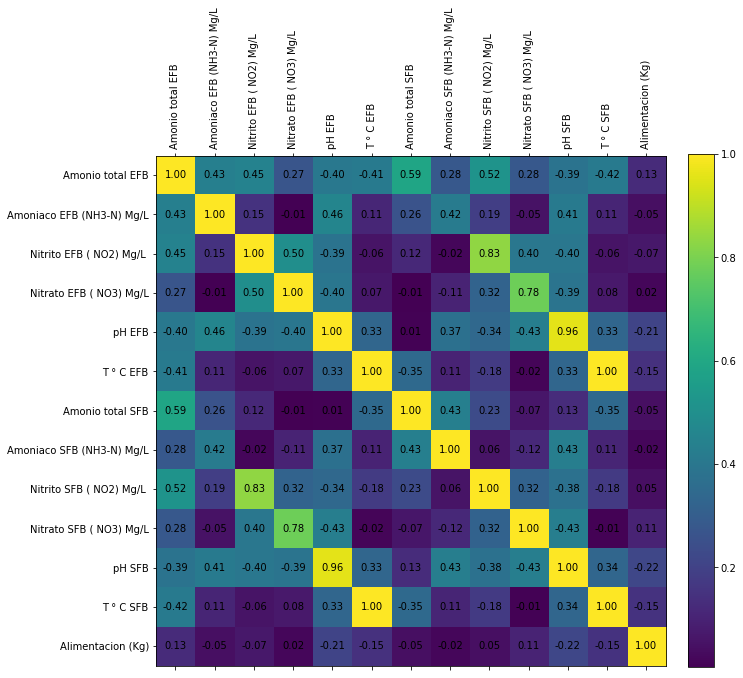

In [20]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
mt = plt.matshow(np.abs(correlations), cmap='viridis', interpolation='nearest', fignum=1)
plt.xticks(range(len(correlations.columns)), original_cols, rotation=90)
plt.yticks(range(len(correlations.columns)), original_cols)
for (i, j), z in np.ndenumerate(correlations):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.colorbar(mt, fraction=0.046, pad=0.04)
plt.show()

Dado que las correlaciones más interesantes son las que se dan en la misma etapa, esto es, o antes o después del filtro biológico, se incluyen solo las primeras en la siguiente matriz para una lectura más simple:

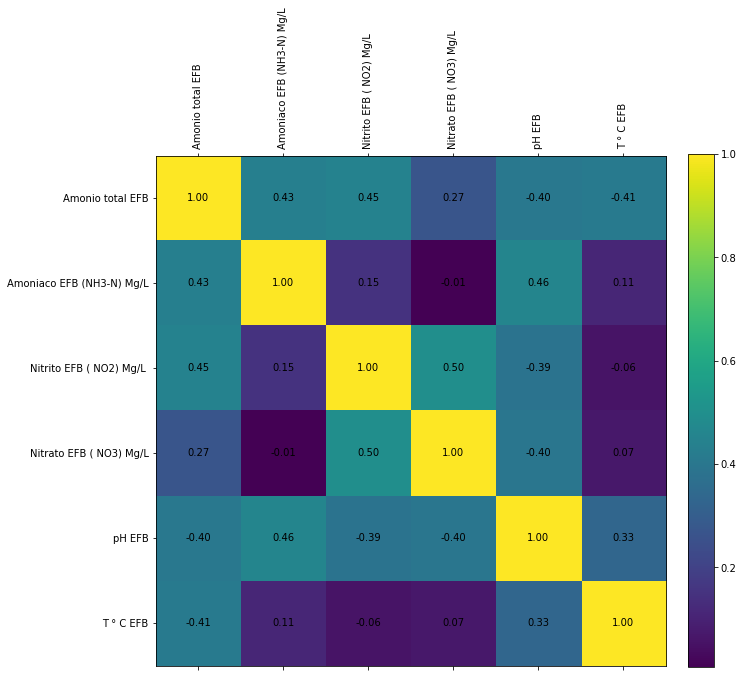

In [21]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
mt = plt.matshow(np.array(np.abs(correlations))[:6, :6], cmap='viridis', interpolation='nearest', fignum=1)
plt.xticks(range(len(correlations.columns[:6])), original_cols[:6], rotation=90)
plt.yticks(range(len(correlations.columns[:6])), original_cols[:6])
for (i, j), z in np.ndenumerate(np.array(correlations)[:6, :6]):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.colorbar(mt, fraction=0.046, pad=0.04)
plt.show()

### Mayores correlaciones

Para observar las relaciones entre pares de parámetros de mejor forma, se seleccionan los pares de mayor correlación y se despliegan como `scatter plots`.

In [22]:
pairs = []
for i in range(len(columns_1)):
    for j in range(len(columns_1)):
        corr = np.array(correlations)[i, j]
        if columns_1[i] != columns_1[j] and abs(corr) > 0.1 and i > j:
            if (columns_1[i].endswith('efb') and columns_1[j].endswith('efb')) or (columns_1[i].endswith('sfb') and columns_1[j].endswith('sfb')):
                pairs.append([i, j, corr])

In [23]:
len(pairs)

24

In [24]:
def correlation_scatters(data, pairs):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 9), constrained_layout=True)
    n = 0
    for i, j, k in pairs:
        ixs = n // 6, n % 6
        axes[ixs].scatter(data[:, i], data[:, j])
        axes[ixs].set_xlabel(original_cols[i])
        axes[ixs].set_ylabel(original_cols[j])
        axes[ixs].set_title(f'Correlation: {k:.2f}')
        n += 1
    plt.show()

In [25]:
pool_1_clean = pool_1.copy()
np.place(pool_1_clean, pool_1_clean == ' ', np.nan)

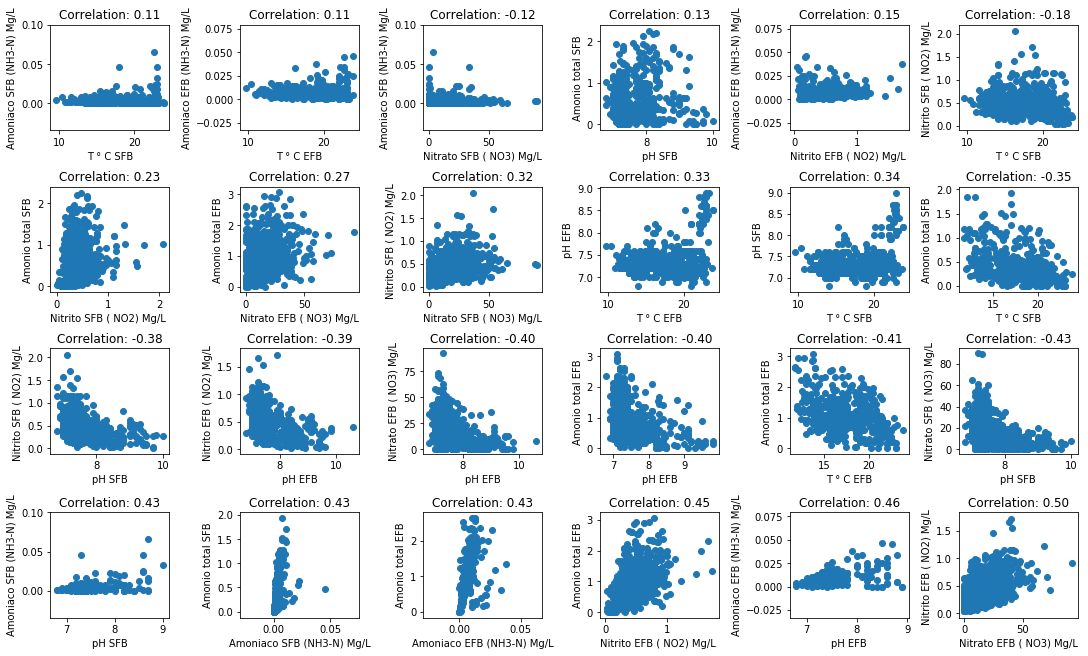

In [26]:
correlation_scatters(pool_1_clean, sorted(pairs, key=lambda x: abs(x[2])))

### Autocorrelaciones

Para apreciar las correlaciones de los parámetros con ellos mismos en distintos tiempos, se muestran las autocorrelaciones:

In [27]:
def autocorrelation_evolutions(data):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 9), constrained_layout=True)
    for i in range(13):
        ixs = i // 4, i % 4
        data_i = data[:, i][~np.isnan(data[:, i].astype(float))]
        axes[ixs].acorr(data_i, maxlags=20)
        axes[ixs].set_xlabel('Time lag')
        axes[ixs].set_title(original_cols[i])
    axes[-1, -1].axis('off')
    axes[-1, -2].axis('off')
    axes[-1, -3].axis('off')
    plt.show()

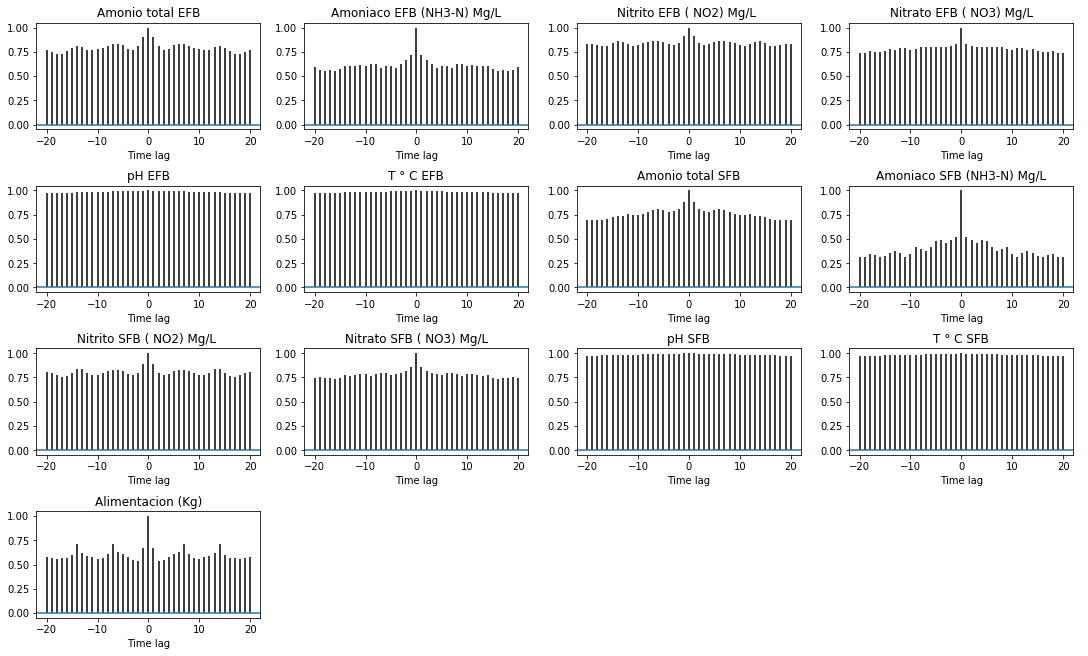

In [28]:
autocorrelation_evolutions(pool_1_clean)

### Correlaciones entre 3 parámetros

In [157]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
columns_1[2], columns_1[3], columns_1[4], columns_1[5], columns_1[12] 

('nitrite_efb', 'nitrate_efb', 'ph_efb', 'temperature_efb', 'food')

In [146]:
def all_nan_indexes(columns):
    indexes = []
    for column in columns:
        indexes.append(np.where(np.isnan(column.astype(float)) == True)[0])
    return np.unique(np.hstack(indexes))

In [166]:
def correlation_3d_scatters(data, trios):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), constrained_layout=True,
                             subplot_kw={'projection': '3d'})
    n = 0
    for i, j, k in trios:
        ixs = n
        trio = [data[:, i].astype(float), data[:, j].astype(float), data[:, k].astype(float)]
        nan_indexes = all_nan_indexes(trio)
        trio = [np.delete(i, nan_indexes) for i in trio]
        axes[ixs].scatter(trio[0], trio[1], trio[2])
        axes[ixs].set_xlabel(original_cols[i])
        axes[ixs].set_ylabel(original_cols[j])
        axes[ixs].set_zlabel(original_cols[k])
        n += 1
    plt.show()

In [167]:
trios = [[2, 3, 4], [2, 3, 5], [2, 3, 12]]

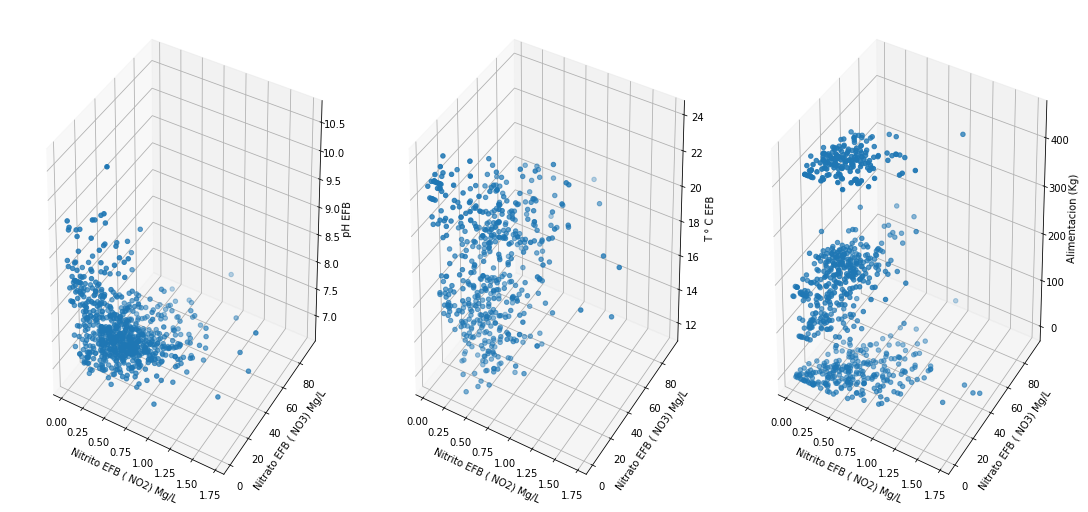

In [169]:
correlation_3d_scatters(pool_1_clean, trios)

### Missing Data

Bajo la hipótesis de que faltan datos de manera aleatoria, se puede intentar probar si faltan de manera completamente aleatoria (MCAR), o no (MAR)

In [179]:
# 1 = NAN, 0 = Está el valor
shadow = np.int_(np.isnan(pool_1_clean.astype(float)))

In [187]:
_dcc = {}
for i in range(len(columns_1)):
    _dcc[columns_1[i]] = shadow[:, i]
shadow_df = pd.DataFrame(_dcc)

In [189]:
shadow_correlations = shadow_df.corr()
shadow_correlations

,ammonium_efb,ammoniac_efb,nitrite_efb,nitrate_efb,ph_efb,temperature_efb,ammonium_sfb,ammoniac_sfb,nitrite_sfb,nitrate_sfb,ph_sfb,temperature_sfb,food
ammonium_efb,1.000000,-0.004558,0.543497,0.664884,0.412316,0.077404,0.892118,-0.000317,0.444761,0.545354,0.286024,0.075913,0.126716
ammoniac_efb,-0.004558,1.000000,0.398112,0.204926,0.445052,0.866705,-0.107878,0.993928,0.327284,0.106626,0.353978,0.868573,0.095626
nitrite_efb,0.543497,0.398112,1.000000,0.791609,0.832377,0.429635,0.303185,0.407658,0.821537,0.552375,0.592983,0.428687,0.233149
nitrate_efb,0.664884,0.204926,0.791609,1.000000,0.642892,0.248329,0.482116,0.212147,0.649703,0.832708,0.452254,0.247236,0.184563
ph_efb,0.412316,0.445052,0.832377,0.642892,1.000000,0.445404,0.215654,0.452670,0.692391,0.449785,0.820785,0.449658,0.194068
temperature_efb,0.077404,0.866705,0.429635,0.248329,0.445404,1.000000,-0.039473,0.869528,0.340530,0.132516,0.347958,0.997918,0.107276
ammonium_sfb,0.892118,-0.107878,0.303185,0.482116,0.215654,-0.039473,1.000000,-0.098432,0.438052,0.604211,0.332586,-0.036281,-0.033603
ammoniac_sfb,-0.000317,0.993928,0.407658,0.212147,0.452670,0.869528,-0.098432,1.000000,0.339100,0.115524,0.363588,0.871382,0.095045
nitrite_sfb,0.444761,0.327284,0.821537,0.649703,0.692391,0.340530,0.438052,0.339100,1.000000,0.698888,0.732337,0.346780,0.009552
nitrate_sfb,0.545354,0.106626,0.552375,0.832708,0.449785,0.132516,0.604211,0.115524,0.698888,1.000000,0.555456,0.137421,-0.005556


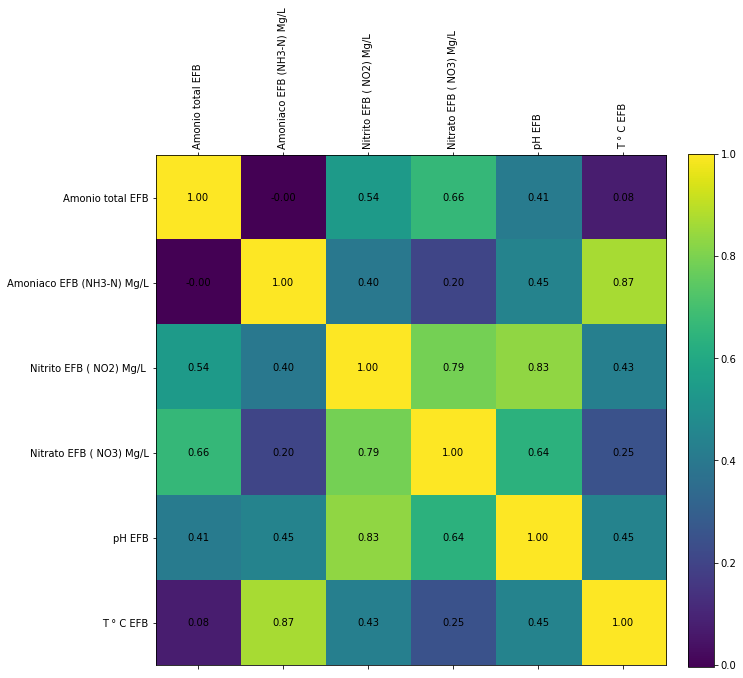

In [215]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
mt = plt.matshow(np.array(shadow_correlations)[:6, :6], cmap='viridis', interpolation='nearest', fignum=1)
plt.xticks(range(len(shadow_correlations.columns[:6])), original_cols[:6], rotation=90)
plt.yticks(range(len(shadow_correlations.columns[:6])), original_cols[:6])
for (i, j), z in np.ndenumerate(np.array(shadow_correlations)[:6, :6]):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.colorbar(mt, fraction=0.046, pad=0.04)
plt.show()

In [340]:
from scipy.stats.stats import pearsonr 

In [400]:
def correlation_whut_scatters(data, pairs):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 9), constrained_layout=True)
    n = 0
    
    for i, j, k, lb, ub in pairs:
        ixs = n // 4, n % 4
        trio = [data[:, i], data[:, j], data[:, 5]]
        to_del = all_nan_indexes(trio)
        trio = [np.delete(i, to_del) for i in trio]
        trio = [i[(trio[2] >= lb) & (trio[2] <= ub)] for i in trio]
        print(trio[2].min(), trio[2].max())
        axes[ixs].scatter(trio[0], trio[1])
        axes[ixs].set_xlabel(original_cols[i])
        axes[ixs].set_ylabel(original_cols[j])
        axes[ixs].set_title(f'Correlation: {pearsonr(trio[0], trio[1])[0]:.2f}')
        n += 1
    plt.show()

In [401]:
aix, bix = 2, 3
total_corr = 0.49576
pairs_ = [
    [aix, bix, total_corr, 11.8, 12.8],
    [aix, bix, total_corr, 12.8, 13.8],
    [aix, bix, total_corr, 13.8, 14.8],
    [aix, bix, total_corr, 14.8, 15.8],
    [aix, bix, total_corr, 15.8, 16.8],
    [aix, bix, total_corr, 16.8, 17.8],
    [aix, bix, total_corr, 17.8, 18.8],
    [aix, bix, total_corr, 18.8, 19.8],
    [aix, bix, total_corr, 19.8, 20.8],
    [aix, bix, total_corr, 20.8, 21.8],
    [aix, bix, total_corr, 21.8, 22.8],
    [aix, bix, total_corr, 22.8, 24],
]

11.8 12.8
12.8 13.8
13.8 14.8
14.8 15.8
15.8 16.8
16.8 17.8
17.8 18.8
18.8 19.8
19.8 20.8
20.8 21.8
21.8 22.8
22.8 23.9


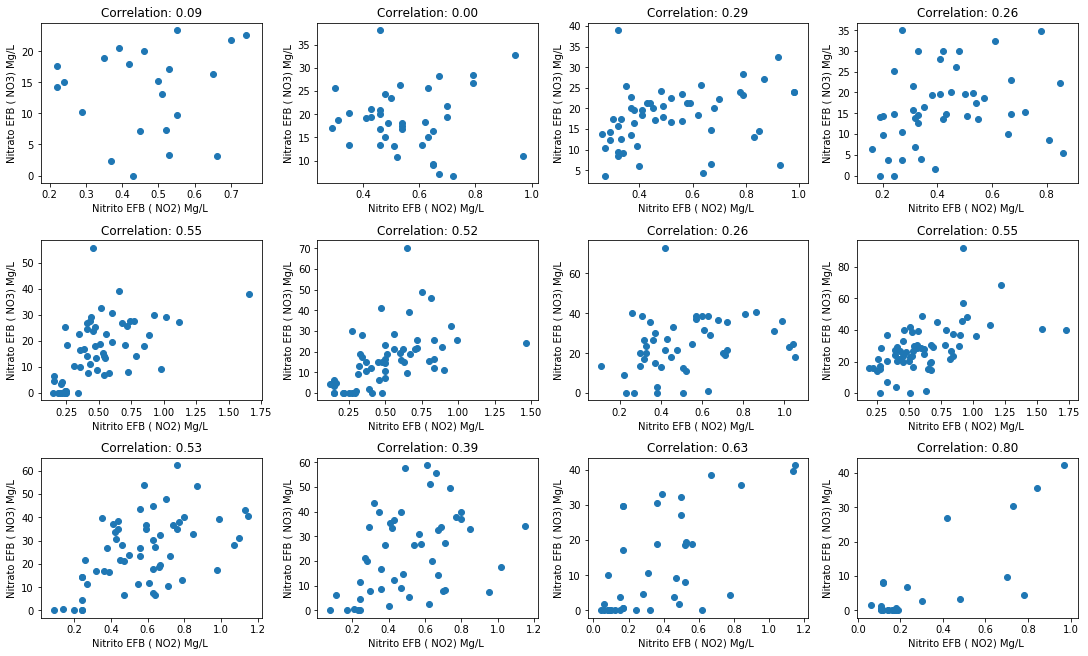

In [402]:
correlation_whut_scatters(pool_1_clean, pairs_)